In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
df = pd.read_pickle('../data/interim/processed_data.pkl')
df.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64


In [3]:
df.reset_index(drop=True, inplace=True)
df.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
0,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64
1,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64
2,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64
3,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64
4,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64


In [6]:
X = df[['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']]
y = df['label']

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)


Epoch 1/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1878 - loss: -5.3461 - val_accuracy: 0.1727 - val_loss: -75.7646
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.1680 - loss: -171.4178 - val_accuracy: 0.1727 - val_loss: -687.5828
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.1751 - loss: -1007.2421 - val_accuracy: 0.1727 - val_loss: -2458.8611
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.1748 - loss: -3199.3582 - val_accuracy: 0.1727 - val_loss: -5859.2915
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.1703 - loss: -7276.6431 - val_accuracy: 0.1727 - val_loss: -11393.3584
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.1760 - loss: -13088.5068 - val_accuracy: 0.1727 - val_loss: -19432.7773
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.1658 - loss: -22698.8379 - val_accuracy: 0.1727 - val_loss: -30222.6738
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━

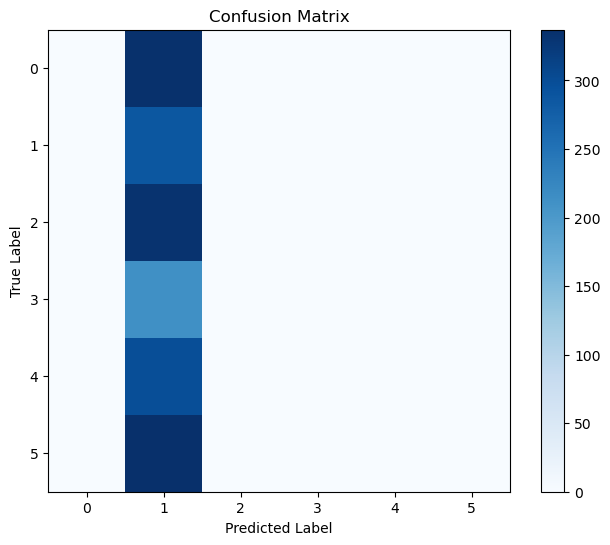

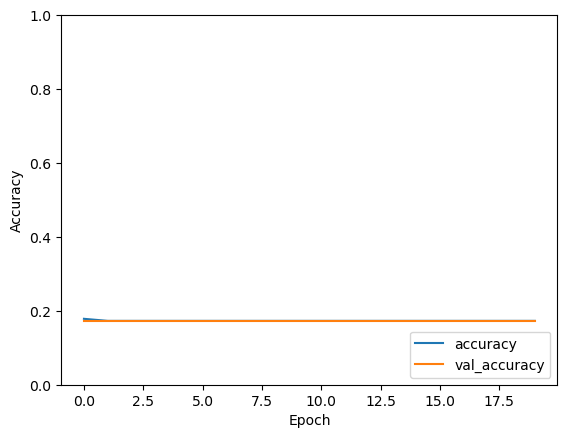

In [14]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)


y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


print("Test Accuracy:", test_accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Time Stamp')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [16]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

trained_data = pd.concat([X_train_df, y_train_df], axis=1)

trained_data.to_csv('../data/interim/trained_data_nn.csv')

In [17]:
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

test_data = pd.concat([X_test_df, y_test_df], axis=1)

test_data.to_csv('../data/interim/test_data_nn.csv')    